<a href="https://colab.research.google.com/github/falsefoobar/CS381/blob/main/R_Leung_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Data Exploration

People choose diamonds for many reasons, often to celebrate key moments like proposals, anniversaries, or promotions. As an expression of love and appreciation, diamonds carry an emotional weight—and a financial one. When purchasing, buyers must weigh numerous hidden factors that influence the price they pay.

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/falsefoobar/CS381/main/diamonds.csv'

df = pd.read_csv(url, index_col=0)

df.shape



(53940, 10)

In [54]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



We have here a set of data of 53,940 diamonds with 10 attributes for each diamond.

price

    price in US dollars ($326–$18,823)
carat

    weight of the diamond (0.2–5.01)
cut

    quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color

    diamond colour, from D (best) to J (worst) ,
clarity

    a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
x

    length in mm (0–10.74)
y

    width in mm (0–58.9)
z

    depth in mm (0–31.8)
depth

    total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
table

    width of top of diamond relative to widest point (43–95)

As shown in the ggplot2 documentation, the `diamonds` data frame, from https://ggplot2.tidyverse.org/reference/diamonds.html#format


# Why are these values important?
These values contribute to a methodology in determining the a reference for the price of diamonds. Grading report or certificate is essential for verifying its quality and authenticity, and is expected to be given with the purchase of a diamond.

A badly cut diamond may be woth significantly less than a well cut diamond. For
color, a colorless diamond is considered to be more desired. And a higher carot weight of a diamond is considered to be more rare compared to a smaller more common diamonds.

Rapaport price lists: Your guide to diamond pricing tools, from https://help.rapnet.com/en/articles/2982406-rapaport-price-lists-your-guide-to-diamond-pricing-tools



<Axes: xlabel='carat', ylabel='depth'>

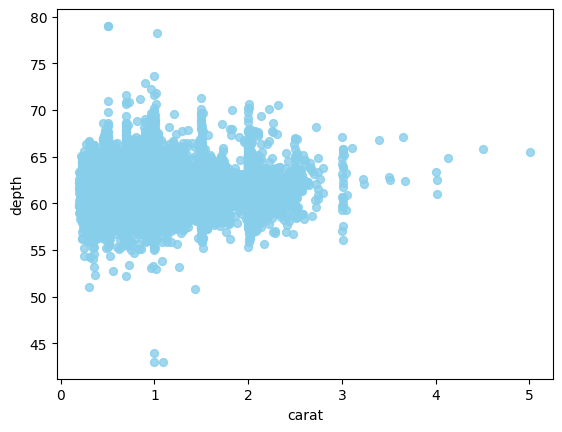

In [105]:

df.plot(kind='scatter', x='carat', y='depth', s=32, alpha=.8, color='skyblue')

In [124]:
depth_mean = df['depth'].mean()
carot_mean = df['carat'].mean()
carat_vals = df['carat'].values

less_than_carot_mean = np.where(carat_vals < carot_mean)[0]

print(f"Depth mean: {depth_mean}")
print(f"Carot mean: {carot_mean}")
print(f"count less than carot mean: {len(less_than_carot_mean)}")

Depth mean: 61.749404894327036
Carot mean: 0.7979397478680014
count less than carot mean: 31127


Diamonds come in variour size, weights and depth.The average carot weight is 0.79 and the depth is 61.74

 How many of the diamonds have a carat value that is less than the mean carat value? 31127



---



What proportion of diamonds are between .30 and 1.08 carats

In [169]:
carat_array = df['carat'].values

# Use np.where to find indices where carat is between 0.30 and 1.08
indices = np.where((carat_array >= 0.30) & (carat_array <= 1.08))[0]

# Calculate proportion
proportion = len(indices) / len(carat_array)

print(f"Proportion of diamonds between 0.30 and 1.08 carats: {proportion:.4f}")

Proportion of diamonds between 0.30 and 1.08 carats: 0.7468


74% of diamonds in this data set are between 0.30 and 1.08 carot. This shows that the inventory consists of mostly diamonds of this size. Smaller diamonds are less desirable to have in inventory, and large diamonds are rarer.




---



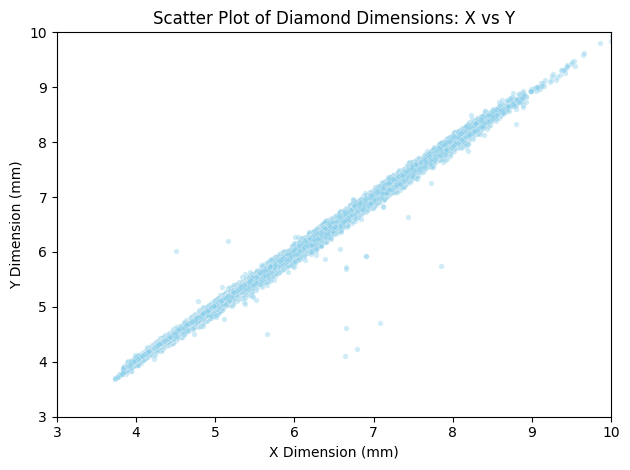

In [167]:
sns.scatterplot(data=df, x='x', y='y', alpha=0.4, s=15, color='skyblue')

# Zoom in on typical diamond sizes
plt.xlim(3, 10)
plt.ylim(3, 10)

plt.title('Scatter Plot of Diamond Dimensions: X vs Y')
plt.xlabel('X Dimension (mm)')
plt.ylabel('Y Dimension (mm)')
plt.tight_layout()
plt.show()

Most of the diamond's x and y measurements are very symmetrical. And even fewer are perfectly symmetrical, only .03%.

---



How many of the diamonds have equal x and y dimensions?


In [119]:
total_diamonds = len(df)
x = df['x'].values
y = df['y'].values
equal_xy = len(np.where(x == y)[0])

print(f"diamonds with equal x and y: {equal_xy} \t percentage of perfectly symmetrical diamonds: {equal_xy/ total_diamonds}")


diamonds with equal x and y: 17 	 percentage of perfectly symmetrical diamonds: 0.00031516499814608824


How many diamonds have a Premium cut or better? Note that the possible values for the quality of a
cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

In [164]:
cuts_list = df['cut'].values
prem_or_better = np.where((cuts_list == 'Premium') | (cuts_list == 'Ideal'))[0]

# Output the count
print(f"Number of diamonds with premium cut or better: {len(prem_or_better)}")
print(f"Percent of premium or better cuts: {(len(prem_or_better) / len(df) ) * 100}%")

Number of diamonds with premium cut or better: 35342
Percent of premium or better cuts: 65.52094920281795%


A approximately 65% porpotion of diamonds are cut with a grading of premium or ideal. So a majority of the cuts on diamonds are crafted to meet a high standard. This shows that premium or ideal cuts are the desired diamonds in this data list.



---



<Axes: xlabel='color'>

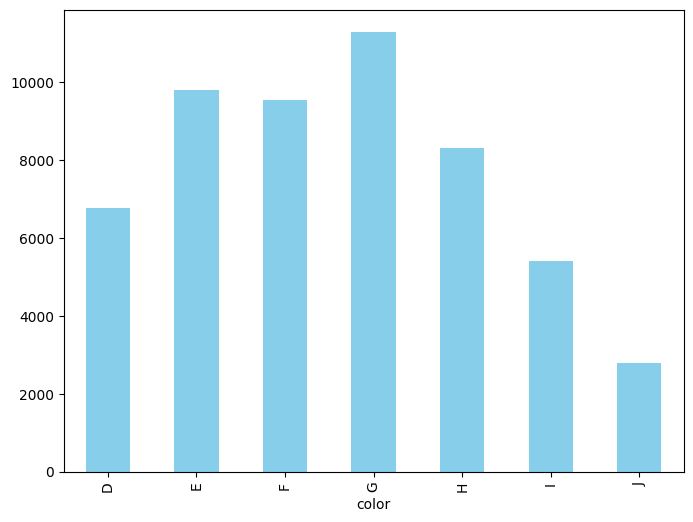

In [97]:
plt.figure(figsize=(8, 6))
df['color'].value_counts().sort_index().plot(kind='bar', color='skyblue')

Text(0, 0.5, 'Count')

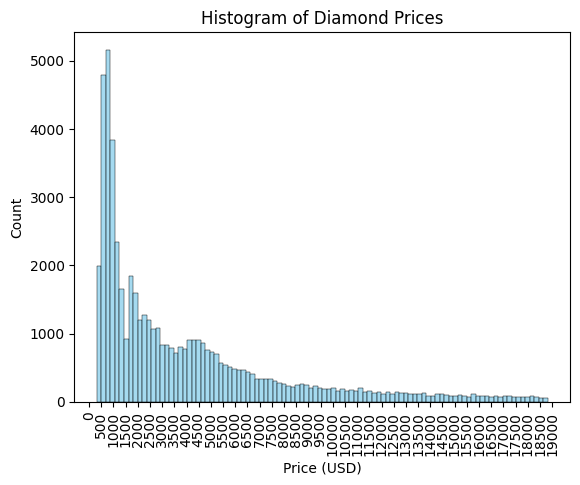

In [103]:

sns.histplot(df['price'], bins=100, color='skyblue')
max_price = df['price'].max()
xticks = np.arange(0, max_price + 500, 500)
plt.xticks(xticks, rotation=90)
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')

The price distrubution of the diamonds skew right, most of the diamonds are between 500 and 2500 dollars.

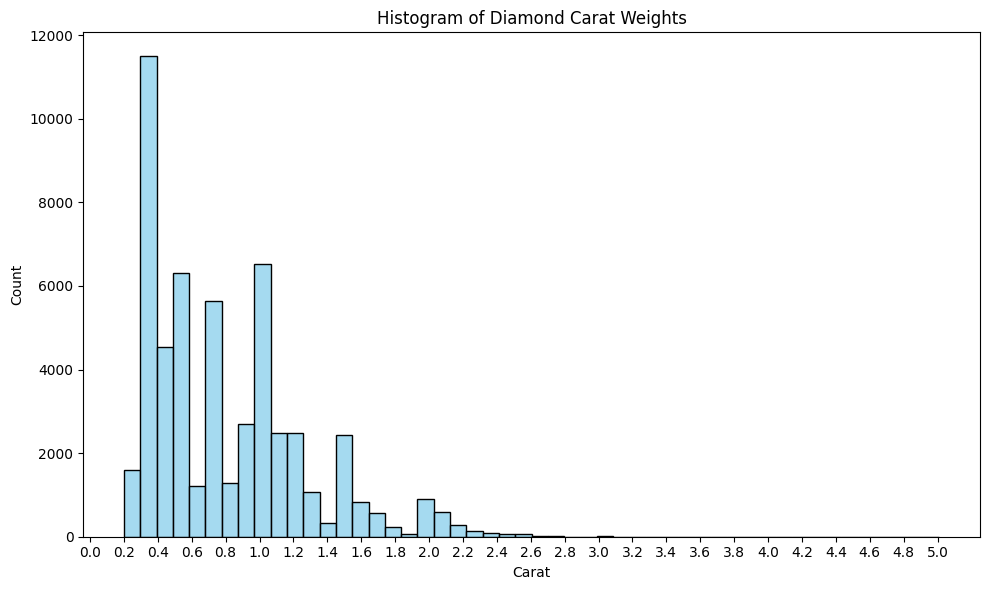

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], bins=50, color='skyblue')

plt.title('Histogram of Diamond Carat Weights')
plt.xlabel('Carat')
plt.ylabel('Count')
plt.tight_layout()
min_carat = df['carat'].min()
max_carat = df['carat'].max()
xticks = np.arange(0, max_carat + 0.1, 0.2)
plt.xticks(xticks, rotation=0)
plt.show()

We can see here that most of the carot diamonds are between 0.3 and 1.0. With 0.3 to 0.4 carots having the most amount of diamonds. Larger diamonds are less common.

Which diamond has the highest price per carat? What is its value?

In [158]:
price = df['price'].values
carat = df['carat'].values

price_per_carat = np.where(carat > 0, price / carat, 0)

max_index = np.argmax(price_per_carat)

max_value = price_per_carat[max_index]
max_diamond = df.iloc[max_index]

print(f"Highest price per carat: ${max_value}")
print("Diamond details:")
print(max_diamond)

Highest price per carat: $17828.846153846152
Diamond details:
carat                      1.04
cut                   Very Good
color                         D
clarity                      IF
depth                      61.3
table                      56.0
price                     18542
x                          6.53
y                          6.55
z                          4.01
price_per_carat    17828.846154
Name: 27636, dtype: object


The highest price diamond in the data set is $18,542. With the carot size of 1.04

Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

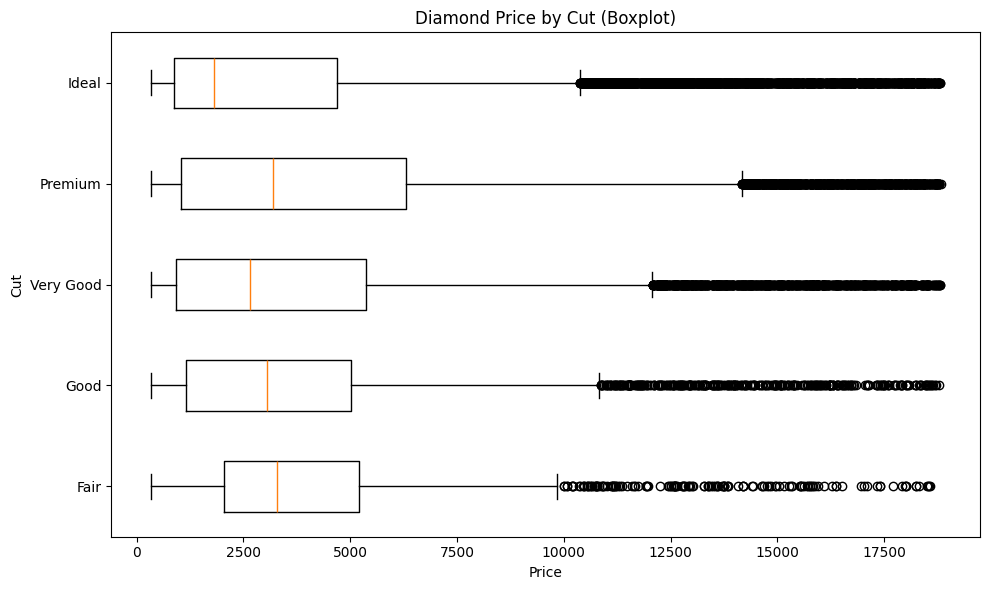

In [159]:
cuts = df['cut'].values
prices = df['price'].values

cut_quality = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_price_groups = [prices[np.where(cuts == cut)] for cut in cut_quality]

plt.figure(figsize=(10, 6))
plt.boxplot(cut_price_groups, labels=cut_quality, vert=False)

plt.title('Diamond Price by Cut (Boxplot)')
plt.ylabel('Cut')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

We can conclude that the diamond cut alone does not determine price.


---



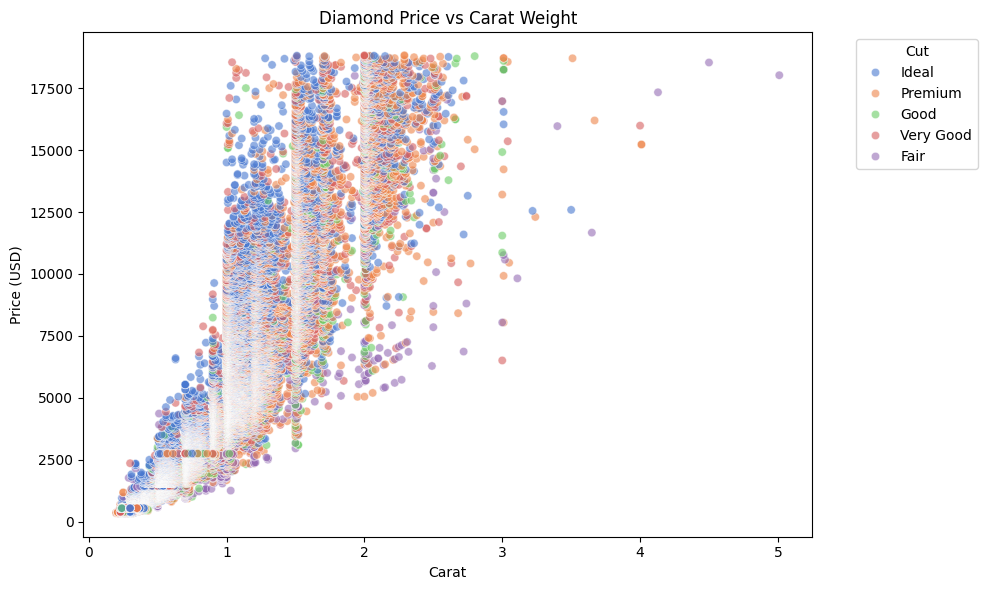

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut', alpha=0.6, palette='muted')
plt.title('Diamond Price vs Carat Weight')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

A Rapaport Price List is the diamond industry standard for the pricing of diamonds. Diamonds are priced based on thier size, weight, color and clarity. More specifically they use carat weights pricing bracket, where diamonds are grouped in

>*0.30-0.39, 0.40-0.49, 0.50-0.69, 0.70-0.89, 0.90-0.99, 1.00-1.49, 1.50-1.99, 2.00-2.99, 3.00-3.99, 4.00-4.99, 5.00-5.99 and 10.00-10.99*


JANNPAUL Diamonds, a repuatable expert in the diamond industry, recommends avoiding round carot numbers, for example:

> 0.40 ct, 0.50ct, 0.70ct, 1.00 ct

Lets see if that is true.

JANNPAUL Diamonds The Four C'S, from https://www.jannpaul.com/content/carat-weight


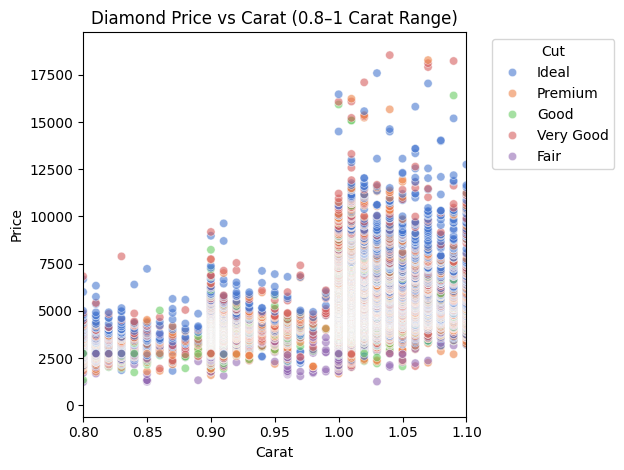

In [145]:
sns.scatterplot(data=df, x='carat', y='price', hue='cut', alpha=0.6, palette='muted')
plt.xlim(0.8, 1.1)
plt.title('Diamond Price vs Carat (0.8–1 Carat Range)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We can see from this data that recommendation is valid. Diamonds in the rounded values are seen to be priced higher. A diamond in the .90 carot with an ideal cut is priced higher than a larger diamond at .95 to .975 carot with an ideal cut. Because of the brackets for carots, there is an interest for jewelers to have their diamond's carot at a rounded number.

---



# Conclusion
In conclusion, while diamond industry celebrate being a emotionally driven industry. It can be rather technically driven when it comes to pricing, speicifcation and etc. Grading systems like those established by the GIA exist to eliminate ambiguity around cut, clarity, color, and carat. Yet these “objective” guidelines can also become powerful marketing tool. Skilled jewelers can manipulate proportions or leverage price brackets. Ultimately, diamonds embody both artistry, while having a personal emotional attchements, and being a science.












# Refererences
https://en.wikipedia.org/wiki/Diamond_(gemstone)

https://4cs.gia.edu/en-us/

https://ggplot2.tidyverse.org/reference/diamonds.html#ref-usage

https://help.rapnet.com/en/articles/2982406-rapaport-price-lists-your-guide-to-diamond-pricing-tools

https://www.youtube.com/watch?v=W9ZQqIitrUw